In [37]:
!pip install git+https://github.com/macrosynergy/macrosynergy@develop

  Cloning https://github.com/macrosynergy/macrosynergy (to revision develop) to /private/var/folders/vx/crpb19sx36gc0mgn_x79dpzr0000gn/T/pip-req-build-8booba1d
  Running command git clone --filter=blob:none --quiet https://github.com/macrosynergy/macrosynergy /private/var/folders/vx/crpb19sx36gc0mgn_x79dpzr0000gn/T/pip-req-build-8booba1d
  Resolved https://github.com/macrosynergy/macrosynergy to commit 2f284af8abe8d19af078f870b80a33eefaaa9160
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for macrosynergy: filename=macrosynergy-0.0.51.dev0+20231207213518.2f284af-py3-none-any.whl size=217428 sha256=638ad6b9c91698d8b4b4683d1454391428bdd8663ec8fb50e10e66f95d9e7075
  Stored in directory: /private/var/folders/vx/crpb19sx36gc0mgn_x79dpzr0000gn/T/pip-ephem-wheel-cache-e98gnlsl/wheels/ba/80/e9/85dfe5d540f3181e471f154d49c7926f4e6b57ce2d481cb5e0
Successfully built macrosynergy
  Attempting uni

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import macrosynergy.management as msm
import macrosynergy.panel as msp
import macrosynergy.signal as mss
import macrosynergy.pnl as msn


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

warnings.simplefilter("ignore")

In [39]:
# Cross-sections of interest

cids_dm = ["AUD", "CAD", "CHF", "EUR", "GBP", "JPY", "NOK", "NZD", "SEK", "USD"]
cids_em = [
    "CLP",
    "COP",
    "CZK",
    "HUF",
    "IDR",
    "ILS",
    "INR",
    "KRW",
    "MXN",
    "PLN",
    "THB",
    "TRY",
    "TWD",
    "ZAR",
]
cids = cids_dm + cids_em
cids_du = cids_dm + cids_em
cids_dux = list(set(cids_du) - set(["IDR", "NZD"]))
cids_xg2 = list(set(cids_dux) - set(["EUR", "USD"]))

In [40]:
# Quantamental categories of interest

ecos = [
    "CPIC_SA_P1M1ML12",
    "CPIC_SJA_P3M3ML3AR",
    "CPIC_SJA_P6M6ML6AR",
    "CPIH_SA_P1M1ML12",
    "CPIH_SJA_P3M3ML3AR",
    "CPIH_SJA_P6M6ML6AR",
    "INFTEFF_NSA",
    "INTRGDP_NSA_P1M1ML12_3MMA",
    "INTRGDPv5Y_NSA_P1M1ML12_3MMA",
    "PCREDITGDP_SJA_D1M1ML12",
    "PCREDITBN_SJA_P1M1ML12",
    "RGDP_SA_P1Q1QL4_20QMA",
    "RYLDIRS02Y_NSA",
    "RYLDIRS05Y_NSA",
]
mkts = [
    "DU02YXR_NSA",
    "DU05YXR_NSA",
    "DU02YXR_VT10",
    "DU05YXR_VT10",
    "EQXR_NSA",
    "EQXR_VT10",
    "FXXR_NSA",
    "FXXR_VT10",
    "FXCRR_NSA",
    "FXTARGETED_NSA",
    "FXUNTRADABLE_NSA",
]

xcats = ecos + mkts

In [41]:
# load the dataset:

df = pd.read_csv('JPMaQS_Quantamental_Indicators.csv', index_col=0, parse_dates=['real_date'])

scols = ["cid", "xcat", "real_date", "value"]  # required columns
df = df[scols].copy()
display (df.tail(3))
df.info()

,cid,xcat,real_date,value
3350268,ZAR,RGDP_SA_P1Q1QL4_20QMA,2023-08-31,0.534737
3350269,ZAR,RYLDIRS02Y_NSA,2023-08-31,3.230619
3350270,ZAR,RYLDIRS05Y_NSA,2023-08-31,3.543863


<class 'pandas.core.frame.DataFrame'>
Index: 3350271 entries, 0 to 3350270
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   cid        object        
 1   xcat       object        
 2   real_date  datetime64[ns]
 3   value      float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 127.8+ MB


In [42]:
display(df['xcat'].unique())
display(df['cid'].unique())
df['ticker'] = df['cid'] + "_" + df["xcat"]
df.set_index('real_date', inplace=True)
df.sort_index(inplace=True)

array(['CPIC_SA_P1M1ML12', 'CPIC_SJA_P3M3ML3AR', 'CPIC_SJA_P6M6ML6AR',
       'CPIH_SA_P1M1ML12', 'CPIH_SJA_P3M3ML3AR', 'CPIH_SJA_P6M6ML6AR',
       'FXTARGETED_NSA', 'FXUNTRADABLE_NSA', 'FXXR_NSA', 'FXXR_VT10',
       'INFTEFF_NSA', 'INTRGDP_NSA_P1M1ML12_3MMA',
       'INTRGDPv5Y_NSA_P1M1ML12_3MMA', 'PCREDITBN_SJA_P1M1ML12',
       'PCREDITGDP_SJA_D1M1ML12', 'RGDP_SA_P1Q1QL4_20QMA',
       'RYLDIRS02Y_NSA', 'RYLDIRS05Y_NSA', 'DU02YXR_NSA', 'DU02YXR_VT10',
       'DU05YXR_NSA', 'DU05YXR_VT10', 'EQXR_NSA', 'EQXR_VT10',
       'FXCRR_NSA'], dtype=object)

array(['AUD', 'CAD', 'CHF', 'CLP', 'COP', 'CZK', 'EUR', 'GBP', 'HUF',
       'IDR', 'ILS', 'INR', 'JPY', 'KRW', 'MXN', 'NOK', 'NZD', 'PLN',
       'SEK', 'THB', 'TRY', 'TWD', 'USD', 'ZAR'], dtype=object)

In [43]:
# LSTM particular implementations

from sklearn.model_selection import TimeSeriesSplit
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras_tuner import RandomSearch
from keras.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [44]:
def build_model(hp):
  model = Sequential()

  model = Sequential()

  model.add(LSTM(hp.Choice('units', [64, 128, 256]), activation='relu', input_shape=(dev_X.shape[1], 1), return_sequences=True))
  model.add(LSTM(hp.Choice('units', [8, 16, 32]), activation='relu', return_sequences=False))
  model.add(Dense(1))
  model.compile(hp.Choice('optimizer', ["adam", "RMSProp", "SGD"]),loss='mse', metrics=[mean_squared_error])
  return model

Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/50
35/35 [==============================] - 2s 48ms/step - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 2/50
35/35 [==============================] - 2s 44ms/step - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 3/50
35/35 [==============================] - 2s 64ms/step - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 4/50
35/35 [==============================] - 2s 50ms/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 5/50
35/35 [==============================] - 2s 53ms/step - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 6/50
35/35 [==============================] - 2s 49ms/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0886 - val_mean_squa

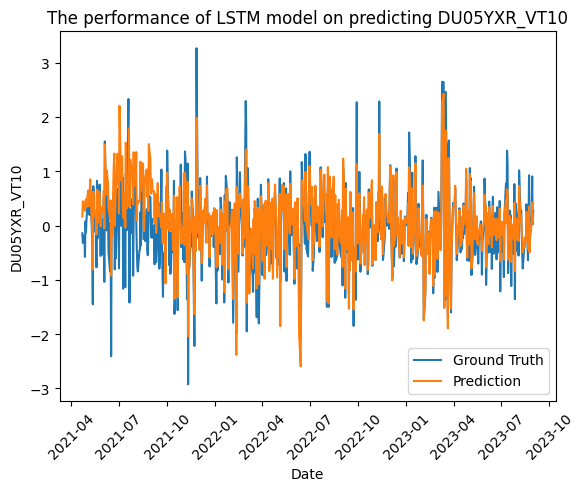

Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/50
70/70 [==============================] - 4s 41ms/step - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 1.9282 - val_mean_squared_error: 1.9282
Epoch 2/50
70/70 [==============================] - 3s 41ms/step - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.6017 - val_mean_squared_error: 0.6017
Epoch 3/50
70/70 [==============================] - 3s 43ms/step - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 4/50
70/70 [==============================] - 3s 43ms/step - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 1.2008 - val_mean_squared_error: 1.2008
Epoch 5/50
70/70 [==============================] - 3s 44ms/step - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 2.4596 - val_mean_squared_error: 2.4596
Epoch 6/50
70/70 [==============================] - 3s 44ms/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.9831 - val_mean_squa

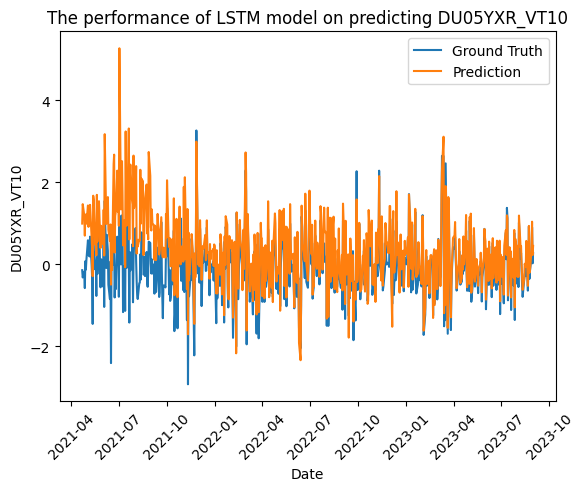

Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/50
104/104 [==============================] - 5s 41ms/step - loss: 0.1240 - mean_squared_error: 0.1240 - val_loss: 0.1773 - val_mean_squared_error: 0.1773
Epoch 2/50
104/104 [==============================] - 4s 40ms/step - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.1730 - val_mean_squared_error: 0.1730
Epoch 3/50
104/104 [==============================] - 4s 39ms/step - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.1677 - val_mean_squared_error: 0.1677
Epoch 4/50
104/104 [==============================] - 4s 42ms/step - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.1541 - val_mean_squared_error: 0.1541
Epoch 5/50
104/104 [==============================] - 4s 40ms/step - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.1849 - val_mean_squared_error: 0.1849
Epoch 6/50
104/104 [==============================] - 4s 38ms/step - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1172 - v

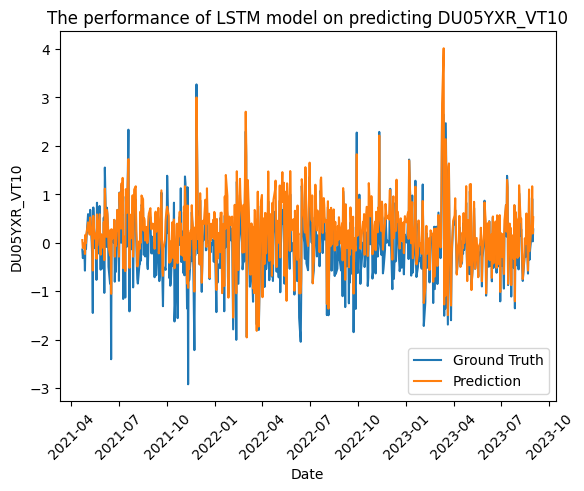

Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/50
139/139 [==============================] - 6s 38ms/step - loss: 0.1444 - mean_squared_error: 0.1444 - val_loss: 0.1821 - val_mean_squared_error: 0.1821
Epoch 2/50
139/139 [==============================] - 5s 39ms/step - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2174 - val_mean_squared_error: 0.2174
Epoch 3/50
139/139 [==============================] - 5s 37ms/step - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.1714 - val_mean_squared_error: 0.1714
Epoch 4/50
139/139 [==============================] - 5s 37ms/step - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.1552 - val_mean_squared_error: 0.1552
Epoch 5/50
139/139 [==============================] - 5s 38ms/step - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 6/50
139/139 [==============================] - 6s 43ms/step - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.1688 - v

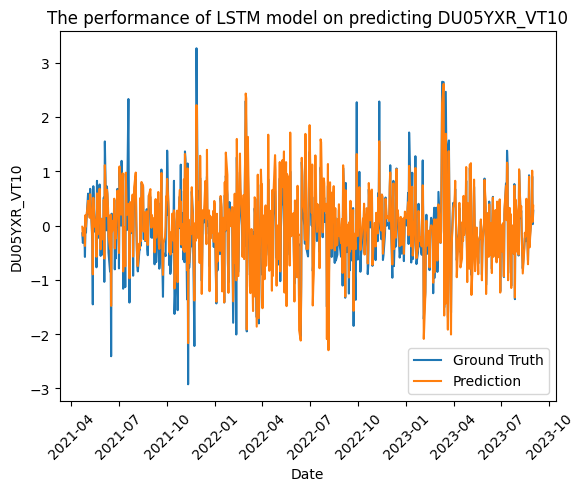

Summary
The avergae mse is: 0.2119477614760399
The avergae mae is: 0.3197730958101805
The avergae r2_score is: 0.5999757414965737


In [46]:


# only consider the USD dollars for now
# only did USD for now, can be extended to other currencies
df_USD = df[df["cid"] == 'USD'] 

# make the xcat features into columns
df_USD = df_USD.pivot_table(index='real_date', columns='xcat', values='value', aggfunc='first')

df_USD = df_USD.reset_index()

# deals with missing data
df_USD = df_USD.dropna()

index = int(len(df_USD) * 0.9)
X_dev, X_test = df_USD.iloc[:index], df_USD.iloc[index:]

# split into training and test data
tss = TimeSeriesSplit(n_splits = 4)


test_y = np.array(X_test['DU05YXR_VT10'])
test_y = test_y.reshape(test_y.shape[0],1)

test_X = np.array(X_test.drop(columns=['DU05YXR_VT10','real_date']))
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

total_mse = 0.0
total_mae = 0.0
total_r2 = 0.0

for train_index, test_index in tss.split(X_dev):

    development_set = df_USD.iloc[train_index]
    val_set = df_USD.iloc[test_index]


    dev_y = np.array(development_set['DU05YXR_VT10'])
    dev_y = dev_y.reshape(dev_y.shape[0],1)

    dev_X = np.array(development_set.drop(columns=['DU05YXR_VT10', 'real_date']))
    dev_X = dev_X.reshape(dev_X.shape[0],dev_X.shape[1],1)


    val_y = np.array(val_set['DU05YXR_VT10'])
    val_y = val_y.reshape(val_set.shape[0],1)

    val_X = np.array(val_set.drop(columns=['DU05YXR_VT10','real_date']))
    val_X = val_X.reshape(val_X.shape[0],val_X.shape[1],1)



    # Hyperparameter training part
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=5)
    
    tuner.search(dev_X, dev_y, epochs=50, validation_data=(val_X, val_y))
    best_model = tuner.get_best_models()[0]
    
    # Retrain on the optimal hyperparameter and evaluate on the test set

    history = best_model.fit(dev_X, dev_y, epochs=50, validation_data=(val_X, val_y))
    records = best_model.evaluate(test_X, test_y)
    results = best_model.predict(test_X)



    print("The following are the results of my best model on the test set")
    print("---------------------------------------------------------------")
    print("The mean square error is " + str(records[1]))
    print("The r2 score is: " + str(r2_score(test_y, results)))
    print("The mean absolute error is: " + str(mean_absolute_error(test_y, results)))

    total_mse += records[1]
    total_r2 += r2_score(test_y, results)
    total_mae += mean_absolute_error(test_y, results)
    
    plt.title("The performance of LSTM model on predicting DU05YXR_VT10")
    plt.plot(X_test['real_date'], X_test['DU05YXR_VT10'])
    plt.plot(X_test['real_date'], results)
    plt.xticks(rotation=45)
    plt.legend(['Ground Truth', 'Prediction'])
    plt.xlabel('Date')
    plt.ylabel('DU05YXR_VT10')
    plt.show()

        
print("Summary")
print("The avergae mse is: " + str(total_mse / 4.0))
print("The avergae mae is: " + str(total_mae / 4.0))
print("The avergae r2_score is: " + str(total_r2 / 4.0))
        





